In [202]:
from rfgap import RFGAP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml

from pi_test_functions import linear_sum, exponential_difference, exponential_interaction

In [203]:
# dataset = fetch_openml(data_id=23515, parser = 'auto')
# x = dataset.data
# y = dataset.target

In [204]:
x = np.random.multivariate_normal(np.zeros((10, )), np.eye(10), 10000)
y = exponential_difference(x)

x_test = np.random.multivariate_normal(np.zeros((10, )), np.eye(10), 1000)
y_test = exponential_difference(x_test)

In [205]:
alpha = 0.05

In [206]:
rf = RFGAP(prediction_type = 'regression', oob_score = mean_squared_error)
rf.fit(x, y, x_test = x_test)
rf.get_weighted_oob_rmse()
rf.get_oob_prediction_interval(alpha = alpha)
oob_pi = rf.weighted_oob_rmse
# rf.prox_weighted_quantile_pi(y, alpha = alpha)

In [207]:
rf.proximities.shape

(10000, 10000)

In [208]:
print('Expected Coverage: ', 1 - alpha)
print('Weighted Coverage: ', rf.oob_rmse_coverage)
print('Quantile Coverage: ', rf.q_pi_coverage)
# print('Prox Weighted Quantile Coverage: ', rf.weighted_quantile_coverage)

Expected Coverage:  0.95
Weighted Coverage:  0.6783
Quantile Coverage:  0.9495


In [209]:
rf.oob_score_

38.15964977368018

In [210]:
# plt.figure(figsize=(8, 8))
# plt.scatter(x, rf.oob_prediction_, label='OOB Predictions', s = 0.5)
# plt.plot(x, y, label='True function', color='orange')
# plt.errorbar(x, rf.oob_prediction_, oob_pi, c = 'gray', alpha = 0.5)

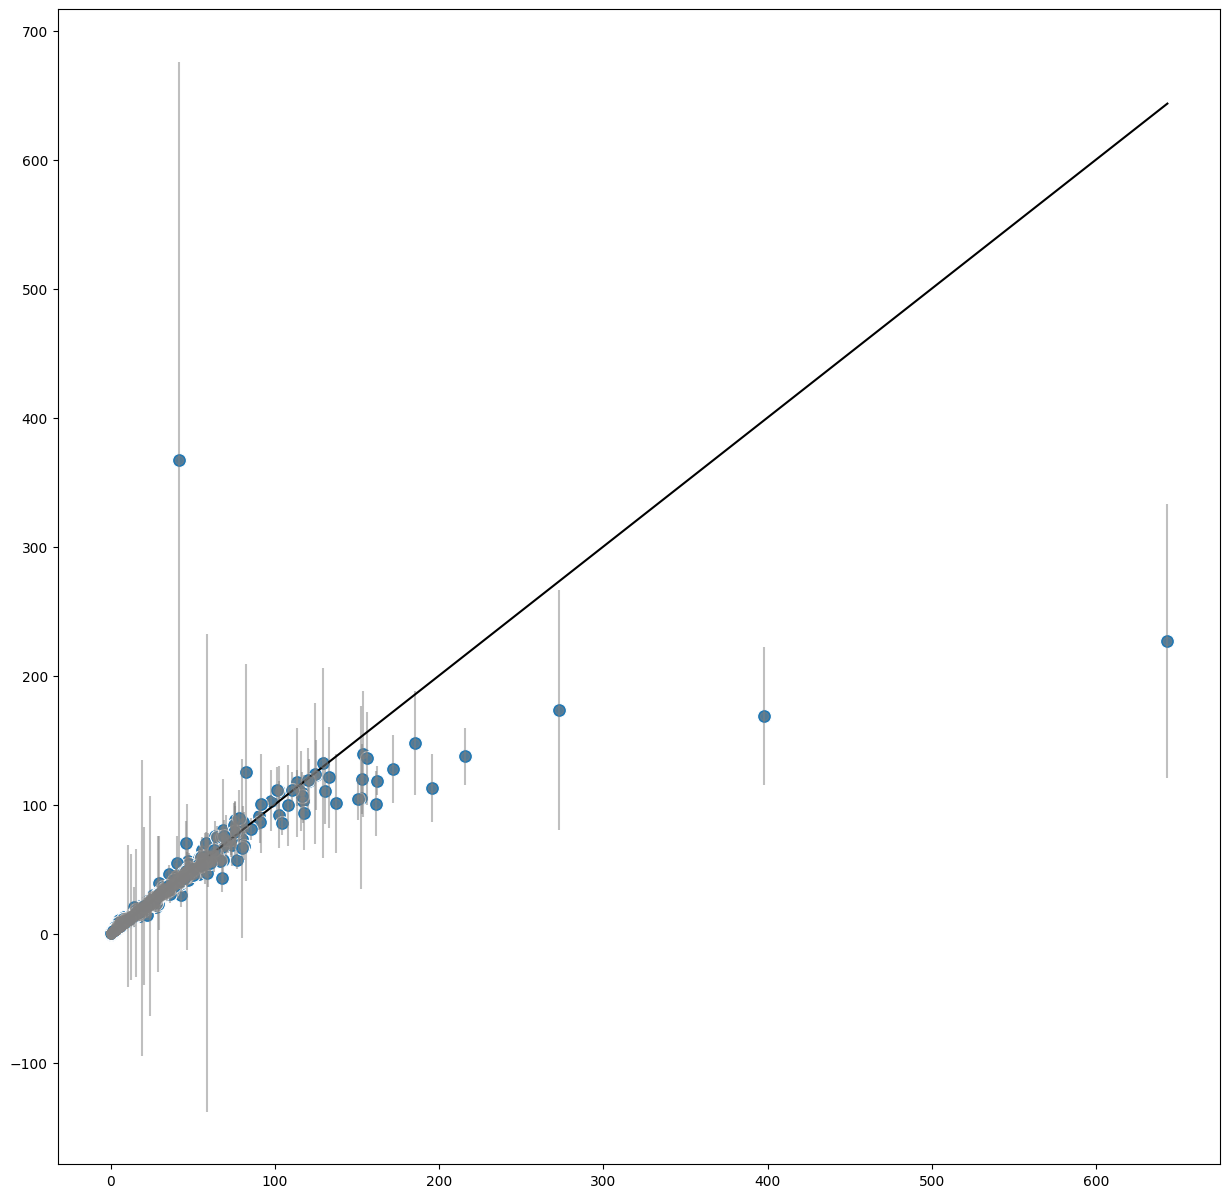

In [211]:
# Need a metric that relates coverage to how far off the predictions are at OOB level
# Need to check out PIs for new points

plt.figure(figsize=(15, 15))
sns.scatterplot(x = y, y = rf.oob_prediction_, s = 100)
plt.errorbar(y, rf.oob_prediction_, yerr = rf.weighted_oob_rmse, c = 'gray', alpha = 0.5, fmt = 'o')
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')
# plt.scatter(y, rf.lb, c = 'red')
# plt.scatter(y, rf.ub, c = 'blue')

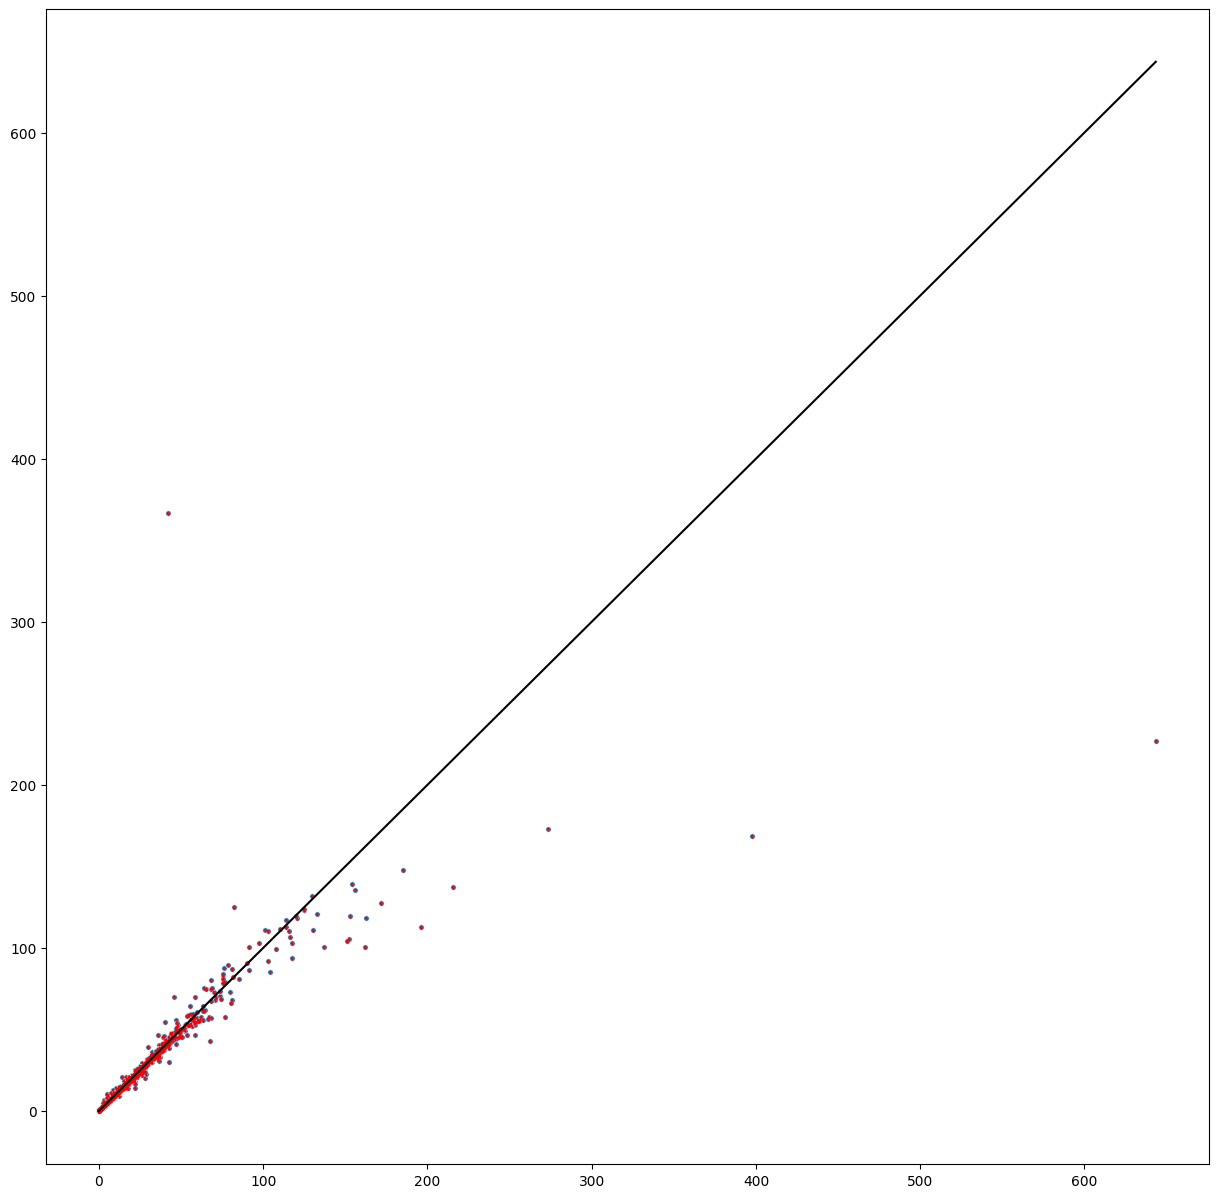

In [212]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x = y, y = rf.oob_prediction_, s = 15)
plt.vlines(y, ymin = rf.oob_prediction_, ymax = rf.oob_pi_ub, colors = 'red', alpha = 1)
plt.vlines(y, ymin = rf.oob_pi_lb, ymax = rf.oob_prediction_, colors = 'red', alpha = 1)
plt.scatter(y, rf.oob_pi_lb, c = 'red', s = 0.5)
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')

0.774


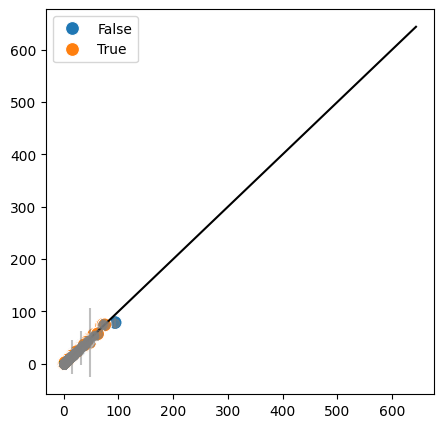

In [213]:
# Need a metric that relates coverage to how far off the predictions are at OOB level
# Need to check out PIs for new points
rf.get_test_intervals(y_test)
print(rf.test_coverage)
test_covered = (y_test >= rf.test_lb) & (y_test <= rf.test_ub)

plt.figure(figsize=(5, 5))
sns.scatterplot(x = y_test, y = rf.test_preds, s = 100, hue = test_covered)
plt.errorbar(y_test, rf.test_preds, yerr = rf.weighted_test_errors, c = 'gray', alpha = 0.5, fmt = 'o')
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')
# plt.scatter(y, rf.lb, c = 'red')
# plt.scatter(y, rf.ub, c = 'blue')

In [214]:
test_lengths = (rf.test_ub - rf.test_lb)

In [215]:
boosted_preds = rf.boost_predict(x_test)

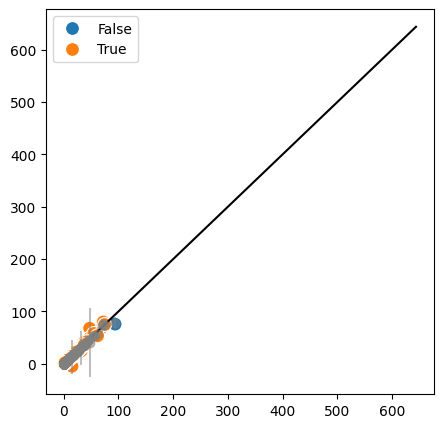

In [216]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = y_test, y = boosted_preds, s = 100, hue = test_covered)
plt.errorbar(y_test, rf.test_preds, yerr = rf.weighted_test_errors, c = 'gray', alpha = 0.5, fmt = 'o')
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')

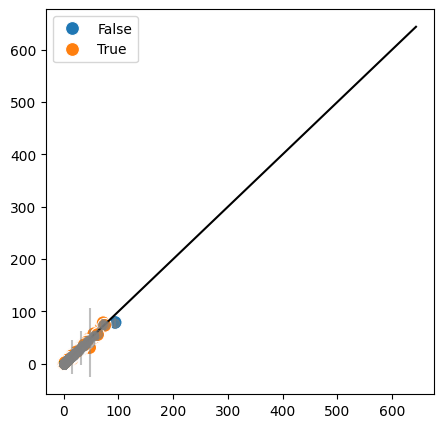

In [217]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = y_test, y = rf.boosted_test_preds2, s = 100, hue = test_covered)
plt.errorbar(y_test, rf.test_preds, yerr = rf.weighted_test_errors, c = 'gray', alpha = 0.5, fmt = 'o')
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')

In [218]:
print(np.sqrt(np.mean((rf.test_preds - y_test)**2)))
print(np.sqrt(np.mean((rf.boosted_test_preds - y_test)**2)))
print(np.sqrt(np.mean((rf.boosted_test_preds2 - y_test)**2)))


0.6257665841396873
1.1852134867227087
0.8287359728597317


In [219]:
np.std(test_lengths[test_covered])

6.096394628819369

In [220]:
np.std(test_lengths[~test_covered])

1.5505023171667116

In [221]:
np.max(test_lengths)

130.5509941125915

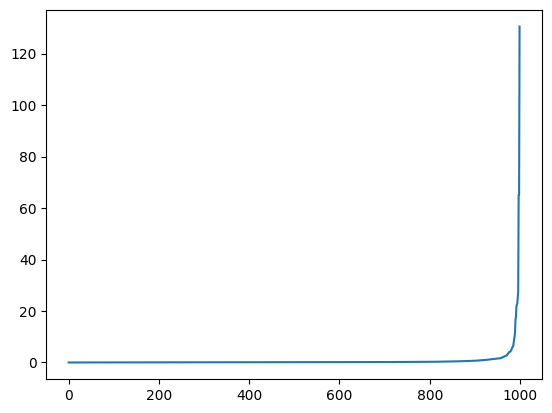

In [222]:
plt.plot(np.sort(test_lengths))

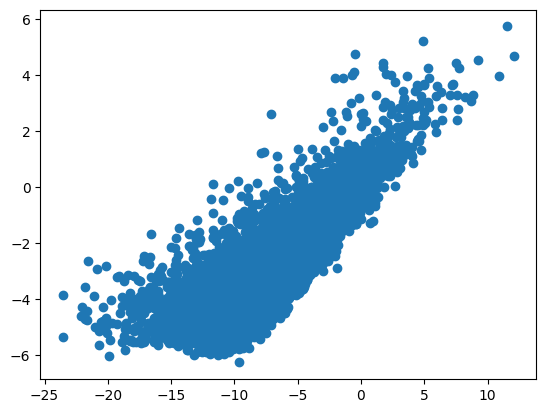

In [223]:
plt.scatter(np.log((rf.oob_prediction_ - y)**2), np.log(oob_pi))

In [224]:
np.corrcoef(np.log((rf.oob_prediction_ - y)**2), np.log(oob_pi))

array([[1.        , 0.79781372],
       [0.79781372, 1.        ]])

In [225]:
np.corrcoef((rf.oob_prediction_ - y)**2, oob_pi)

array([[1.        , 0.52943574],
       [0.52943574, 1.        ]])

In [226]:
rf.proximity_covar()

AttributeError: 'RFGAP' object has no attribute 'proximity_covar'

In [ ]:
prox_covar = rf.prox_covar

In [ ]:
prox_covar.sum()

In [ ]:
(y - np.mean(y)) @ np.linalg.inv(prox_covar) @ (y - np.mean(y))

In [ ]:
((y - np.mean(y)) @ np.linalg.inv(prox_covar))

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed')

emb = mds.fit_transform((prox_covar + prox_covar.T)/2)

In [ ]:
import seaborn as sns
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], c = y)

In [ ]:
plt.imshow(np.linalg.inv(prox_covar))

In [ ]:
plt.imshow(rf.proximities)

In [ ]:
np.max(np.linalg.inv(prox_covar))

In [ ]:
np.linalg.inv(x.T  @ x) @ x.T  @ y

In [ ]:
beta = np.linalg.inv(x.T @ prox_covar @ x) @ x.T @ prox_covar @ y

In [ ]:
plt.plot(y)

In [ ]:
plt.plot(y - np.linalg.inv(prox_covar) @ y)

In [ ]:
plt.plot(y - prox_covar @ y)

In [ ]:
beta

In [ ]:
#TODO: Come up with simulated data to check coverage of a repeated missing point.
# TODO: Write up a metric

In [ ]:
# what to do about cases that are not near any other points?